In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

%matplotlib inline

In [234]:
#GATHER
df = pd.read_csv('munich_airbnb_data/listings.csv')

#ASSES AND ANALYZE
print(df.shape)      # Dimensions 
print(df.shape[1])   # Number of columns 
print(df.columns)    # All the column names to understand the data 
df.info();           # this is to get all the information about the dataframe and which column have missing values and their data types

(11481, 16)
16
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 16 columns):
id                                11481 non-null int64
name                              11459 non-null object
host_id                           11481 non-null int64
host_name                         11458 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     11481 non-null object
latitude                          11481 non-null float64
longitude                         11481 non-null float64
room_type                         11481 non-null object
price                             11481 non-null int64
minimum_

In [235]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36720,"Beautiful 2 rooms flat, Glockenbach",158413,Gabriela,NaN,Ludwigsvorstadt-Isarvorstadt,48.13057,11.56929,Entire home/apt,95,2,25,2017-07-22,0.37,1,0
1,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.11476,11.48782,Entire home/apt,80,2,131,2019-10-03,1.32,1,84
2,114695,Apartment Munich/East with sundeck,581737,NaN,NaN,Berg am Laim,48.11923,11.63726,Entire home/apt,95,1,53,2019-10-06,0.52,2,163
3,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.15198,11.56486,Entire home/apt,120,3,82,2019-07-21,0.79,2,0
4,157808,"Near Olympia,English Garden",759734,Christian,NaN,Schwabing-West,48.16381,11.56089,Private room,35,1,0,NaN,NaN,1,5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8927 entries, 0 to 11447
Data columns (total 16 columns):
id                                8927 non-null int64
name                              8916 non-null object
host_id                           8927 non-null int64
host_name                         8911 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     8927 non-null object
latitude                          8927 non-null float64
longitude                         8927 non-null float64
room_type                         8927 non-null object
price                             8927 non-null int64
minimum_nights                    8927 non-null int64
number_of_reviews                 8927 non-null int64
last_review                       8927 non-null object
reviews_per_month                 8927 non-null float64
calculated_host_listings_count    8927 non-null int64
availability_365                  8927 non-null int64
dtypes: float64(4)

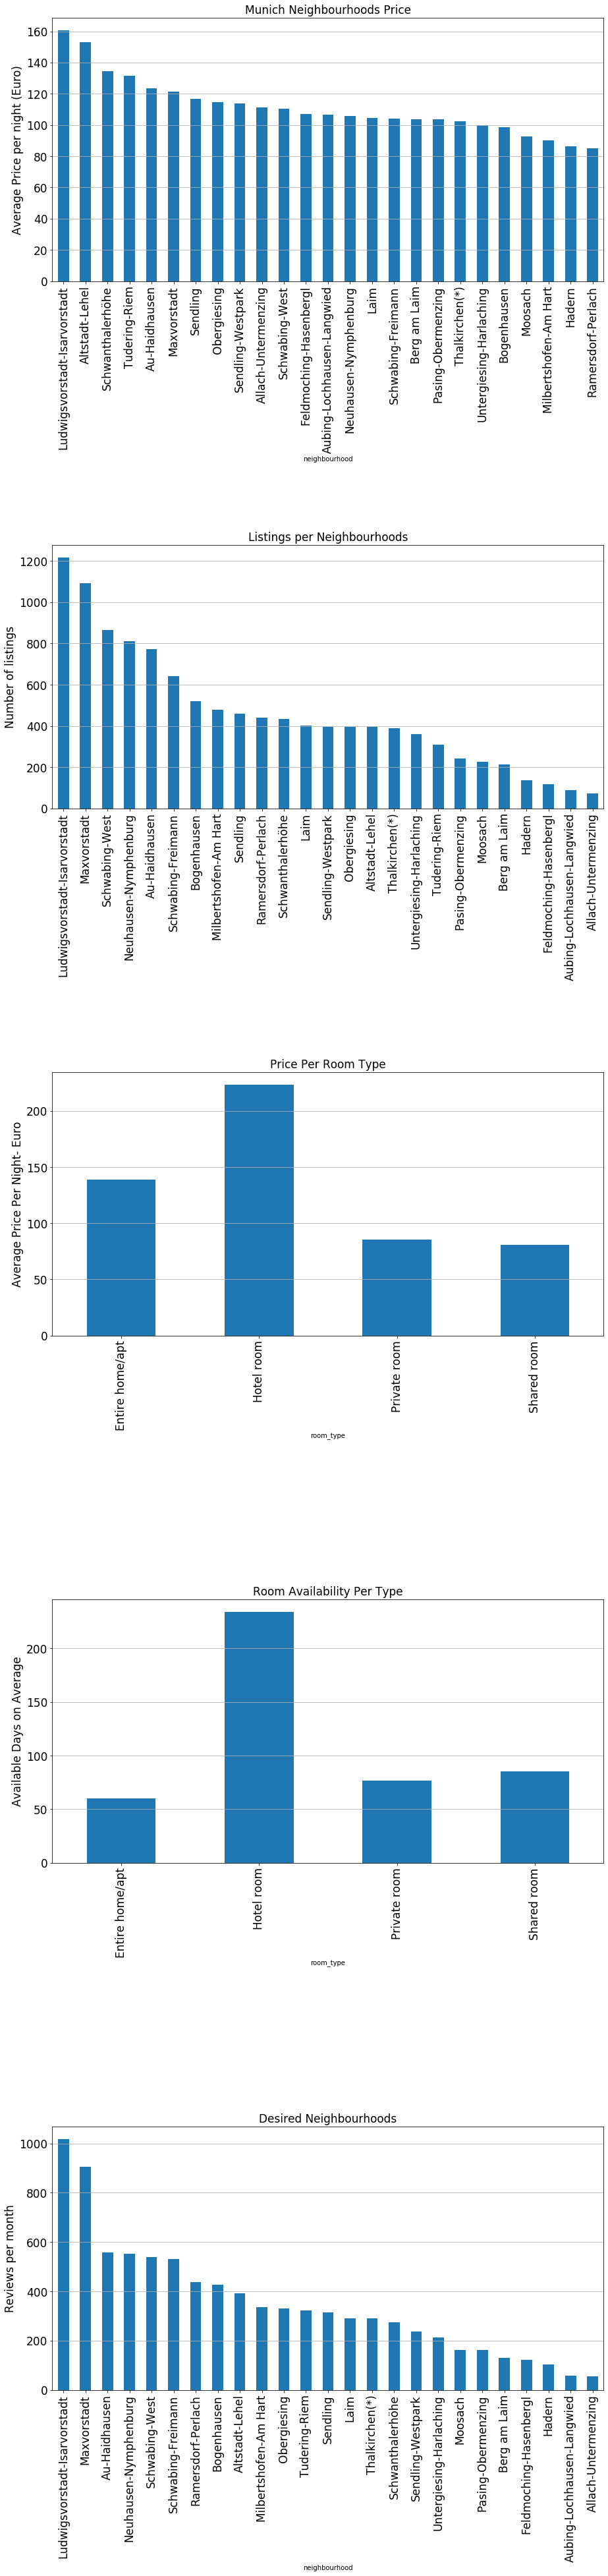

In [236]:
#num_missing_vals = df.isna().sum()
#index_to_rm = df[df['price'] >= 8000].index
#df.drop(index = index_to_rm, inplace = True)
#print(df['price'].describe())

#CLEAN
#Replacing string with the main district name for better understanding in visualization
df['neighbourhood'] = df.neighbourhood.str.replace('Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln', 'Thalkirchen(*)')

#VISUALIZE
figsize = (15, 20)
fontsize = 17
fig,axes = plt.subplots(nrows=5, ncols=1, figsize=figsize)
fig.subplots_adjust(top=5, bottom = 2.5, hspace= 1, wspace = 13)

#QUESTION: FINDING MOST EXPENSIVE MUNICH NEIGHBOURHOOODS
axes[0].set_title('Munich Neighbourhoods Price', fontsize = fontsize )
axes[0].set_ylabel('Average Price per night (Euro)', fontsize = fontsize)
df.groupby('neighbourhood')['price'].mean().sort_values(ascending = False).plot(ax=axes[0],kind='bar',grid=True,fontsize=fontsize).grid(axis ='x')

#QUESTION: FINDING NEIGHBOURHOOD WITH MOST LISTINGS
axes[1].set_title('Listings per Neighbourhoods', fontsize = fontsize )
axes[1].set_ylabel('Number of listings', fontsize = fontsize)
df['neighbourhood'].value_counts().plot(ax=axes[1], kind='bar', grid= True, fontsize=fontsize).grid(axis = 'x')

#QUESTION: FINDING PRICE PER ROOM TYPE
axes[2].set_title('Price Per Room Type', fontsize = fontsize )
axes[2].set_ylabel('Average Price Per Night- Euro', fontsize = fontsize)
df.groupby('room_type')['price'].mean().plot(ax=axes[2], kind='bar', grid=True, fontsize=fontsize).grid(axis = 'x')

axes[3].set_title('Room Availability Per Type', fontsize = fontsize )
axes[3].set_ylabel('Available Days on Average', fontsize = fontsize)
df.groupby('room_type')['availability_365'].mean().plot(ax=axes[3], kind='bar', grid=True, fontsize=fontsize).grid(axis = 'x')

#QUESTION: FINDING MOST DESIRED NEIGHBOURHOOD
axes[4].set_title('Desired Neighbourhoods', fontsize = fontsize )
axes[4].set_ylabel('Reviews per month', fontsize = fontsize)

#--Clean and Visualize--#
#remove nan values from this column before plotting 
df = df.dropna(subset=['reviews_per_month'])
df.info()
df.groupby('neighbourhood')['reviews_per_month'].sum().sort_values(ascending = False).plot(ax=axes[4], kind = 'bar',grid= True, fontsize=fontsize).grid(axis = 'x')

(175562, 2)
2
Index(['listing_id', 'date'], dtype='object')
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175562 entries, 0 to 175561
Data columns (total 2 columns):
listing_id    175562 non-null int64
date          175562 non-null object
dtypes: int64(1), object(1)
memory usage: 2.7+ MB
--------------------------------------
datetime64[ns]


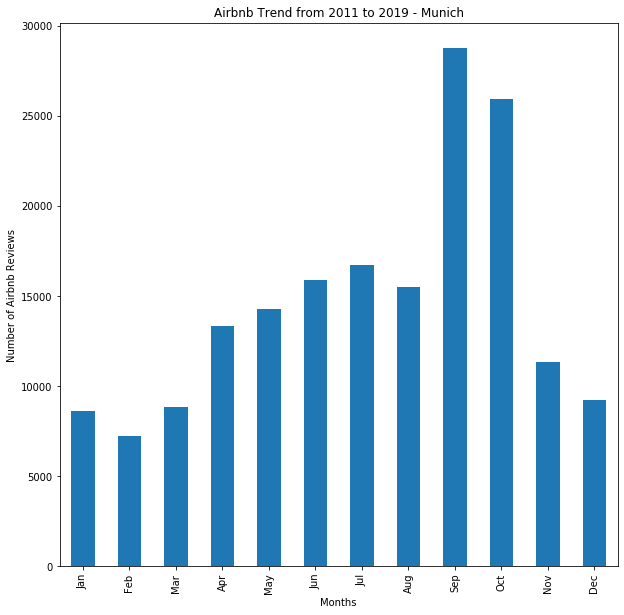

In [241]:
#QUESTION : FINDING BUSIEST TIME OF YEAR FOR MUNICH
# To answer this question , reviews data is used

#GATHER
df = pd.read_csv('munich_airbnb_data/reviews.csv')

#ASSESS AND ANALYZE
#Data Understanding 
print(df.shape)      # Dimensions 
print(df.shape[1])   # Number of columns 
print(df.columns)    # All the column names to understand the data
print('--------------------------------------')
df.info()            # this is to get all the information about the dataframe and which column have missing values and their data types
print('--------------------------------------')
cats = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']

#PREPARE
df['date'].value_counts()
df['date'] = pd.to_datetime(df['date'])
print (df['date'].dtype)

#For extracting year,month and day to new column
df['year']  = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day']   = df['date'].dt.day

df.sort_values(by=['year', 'month'], ascending = True, inplace=True)
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

#VISUALIZE
figsize = (10, 10)
month_count = df['month'].value_counts(sort=False)
month_count=month_count.reindex(cats)
plt.xlabel('Months')
plt.ylabel('Number of Airbnb Reviews')
month_count.plot( kind='bar',legend= False, title='Airbnb Trend from 2011 to 2019 - Munich',figsize=figsize )

In [204]:
df = pd.read_csv('munich_airbnb_data/listings 2.csv')

print(df.shape)          # Dimensions 
print(df.shape[1])       # Number of columns 
print(df.columns.values) # All the column names to get an insight into the data 


(11481, 106)
106
['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
 'description' 'experiences_offered' 'neighborhood_overview' 'notes'
 'transit' 'access' 'interaction' 'house_rules' 'thumbnail_url'
 'medium_url' 'picture_url' 'xl_picture_url' 'host_id' 'host_url'
 'host_name' 'host_since' 'host_location' 'host_about'
 'host_response_time' 'host_response_rate' 'host_acceptance_rate'
 'host_is_superhost' 'host_thumbnail_url' 'host_picture_url'
 'host_neighbourhood' 'host_listings_count' 'host_total_listings_count'
 'host_verifications' 'host_has_profile_pic' 'host_identity_verified'
 'street' 'neighbourhood' 'neighbourhood_cleansed'
 'neighbourhood_group_cleansed' 'city' 'state' 'zipcode' 'market'
 'smart_location' 'country_code' 'country' 'latitude' 'longitude'
 'is_location_exact' 'property_type' 'room_type' 'accommodates'
 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'amenities' 'square_feet'
 'price' 'weekly_price' 'monthly_price' 'security_deposit' 'cleaning_fee'

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [237]:
#QUESTION: PRICE TREND FOR YEAR 2020
#THIS WAS NOT SHARED IN BLOG POST AS IT DOES NOT PROVIDE ANY USEFUL INSIGHTS IN PRICE TRENDS FOR YEAR 2020

#GATHER
df = pd.read_csv('munich_airbnb_data/calendar.csv')

#ASSESS AND ANALYZE
print(df.shape)      # Dimensions 
print(df.shape[1])   # Number of columns 
print(df.info())     # # this is to get all the information about the dataframe and which column have missing values and their data types
df.head()

(4190565, 7)
7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4190565 entries, 0 to 4190564
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
dtypes: int64(3), object(4)
memory usage: 223.8+ MB
None


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,216529,2019-11-25,f,$150.00,$150.00,5,60
1,159634,2019-11-25,f,$53.00,$53.00,14,90
2,159634,2019-11-26,f,$53.00,$53.00,14,90
3,159634,2019-11-27,f,$53.00,$53.00,14,90
4,159634,2019-11-28,f,$53.00,$53.00,14,90


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4190394 entries, 0 to 4190564
Data columns (total 10 columns):
listing_id        int64
date              datetime64[ns]
available         object
price             float64
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
year              int64
month             int64
day               int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 351.7+ MB


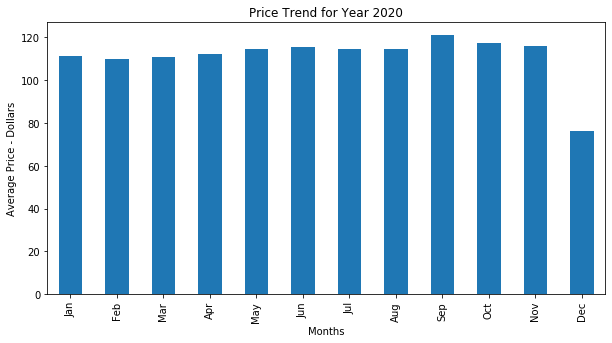

In [238]:
#CLEAN
df['price'] = df.price.str.replace('$', '')
df['price'] = df.price.str.replace(',', '')
df['price'] = df.price.astype(float)

df = df.dropna()

#PREPARE
#For extracting year,month and day to new column,follow the code:
df['date'] = pd.to_datetime(df['date'])
df['year']  = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day']   = df['date'].dt.day

#AFTER ADDING NEW COLUMNS, CHECK AGAIN 
df.info()
df.dtypes

year_grp = df.groupby('year')
year_df = year_grp.get_group(2020)
month = year_df.groupby('month')['price'].mean()
month = pd.Series(month)
month.index =cats

#VISUALIZE
plt.xlabel('Months')
plt.ylabel('Average Price - Dollars')
month.plot(kind='bar',figsize=(10,5), title='Price Trend for Year 2020')

In [286]:
def district_price_yearly_trend(df,name):
    '''
    INPUT - df: dataframe 
            name: district name for which we would like to get price trend
    OUTPUT - avg_price: returns average price for each month of selected year 
    '''
    district = df.get_group(name)
    #print(district[district['price'] >= 1000]) # Check if any price above threshold
    district.drop(district[district['price'] >= 2000].index , inplace = True)
    #district['price'].describe
    #year_grp = district.groupby('year')
    #target_year = year_grp.get_group(year)   
    #avg_price = target_year.groupby('month')['price'].mean()
    avg_price = district.groupby('month')['price'].mean()
    avg_price.set_value(12,0) #adding 12th value to assign month index otherwise it complains
    avg_price.index = cats #mapping numerical month values to text
    return avg_price
   

def compare_and_match(df1, df2, column_name):
    '''
    INPUT - column_name: column name on which we want to match 
            df1: data frame 1     
            df2: data frame 2
    OUTPUT - district_grp: returns a group by object based on neighbourhood 
    '''
    #Get all the listings for year given year with the year and month to see the price trend 
    #for selected neighbourhoods . Merged dataframe provides the month and year information 
    #about listings as well which was missing
    merged_df = pd.merge(df1, df2, on=[column_name], how='inner') #match listing id from two data frame to get price for months
    #print(merged_df.info()) #No missing entries into the price, year and neighbourhood columns
    district_grp = merged_df.groupby('neighbourhood')
    return district_grp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175562 entries, 0 to 175561
Data columns (total 6 columns):
listing_id       175562 non-null int64
id               175562 non-null int64
date             175562 non-null object
reviewer_id      175562 non-null int64
reviewer_name    175562 non-null object
comments         175488 non-null object
dtypes: int64(3), object(3)
memory usage: 8.0+ MB
None


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-286-392568a5760a>:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  avg_price.set_value(12,0) #adding 12th value to assign month index otherwise it complains


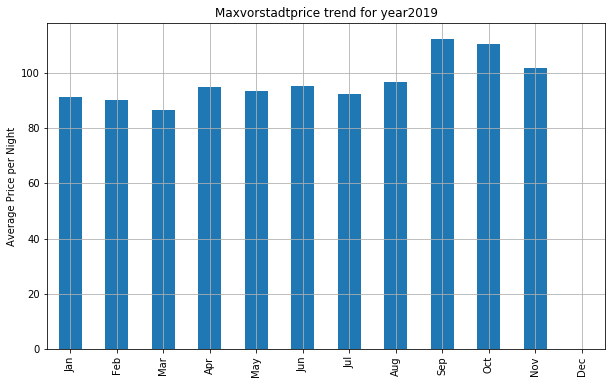

In [287]:
#YEARLY PRICE TREND FOR DISTRCITS MONTHWISE 
#PLEASE NOT THAT LISTING DATA IS FOR YEAR 2019 ONLY

target_year_for_analysis = 2019
target_district = 'Maxvorstadt'

#GATHER
df_review = pd.read_csv('munich_airbnb_data/reviews 2.csv')
df_listing = pd.read_csv('munich_airbnb_data/listings.csv')

#ASSES AND ANALYZE
print(df_review.info())

#PREPARE
#split date into year, month and date
df_review['date']  = pd.to_datetime(df_review['date'])
df_review['year']  = df_review['date'].dt.year
df_review['month'] = df_review['date'].dt.month
df_review['day']   = df_review['date'].dt.day

#rename id column to listing id in listing dataframe - for matching same column in review data frame
df_listing.rename(columns={'id': 'listing_id'}, inplace=True)
year_grp = df_review.groupby('year')
get_year = year_grp.get_group(target_year_for_analysis)  

#this function will return district group
district_grp = compare_and_match(get_year, df_listing, 'listing_id')

#This function returns average price for specific year and district month wise 
avg_price = district_price_yearly_trend(district_grp, target_district)

#VISUALIZE
figsize = (10, 6)
plt.ylabel('Average Price per Night')
avg_price.plot(kind = 'bar', title = target_district+'price trend for year'+str(target_year_for_analysis), grid=True, figsize= figsize) 